# Video games sales prediction MVP 

## Intro
**In this will MVP will train a model to predict global sales game assuming the game will be release first in Japan and Europe Markets first. depending on this the model will predict these values. this project is based in pervious proposal [click  here!](ProjectProposal/proposal.md) to see it.**

## Dataset loading stage

In [84]:
# Necessary imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn import linear_model
%matplotlib inline

In [85]:
# Load data
df =  pd.read_csv("D:/T5 course/archive/vgsales.csv")
# Take a look at the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


## Data Exploring and cleaning stage

In [86]:
df.shape

(16598, 11)

In [87]:
# Take a look at the first few rows
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [88]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

## In this data set there are 11 columns. Their names and data types as follows:

- Rank - Ranking of overall sales, integer

- Name - The games name, object

- Platform - Platform of the games release (i.e. PC,PS4, etc.), object

- Year - Year of the game's release, float

- Genre - Genre of the game ,object

- Publisher - Publisher of the game

- NA_Sales - Sales in North America (in millions)

- EU_Sales - Sales in Europe (in millions)

- JP_Sales - Sales in Japan (in millions)

- Other_Sales - Sales in the rest of the world (in millions)

- Global_Sales - Total worldwide sales.

In [89]:
# droping missing values
df.dropna(subset=['Publisher'],inplace=True);
# filling missing values
df['Year'].fillna(method='ffill',inplace=True);
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


### Action Genre has the Highest Global Sales and Platform Genre has Highest Average Global Sales

In [90]:
totalsales=round(df.groupby(['Genre']).sum(),0)
totalsales.reset_index(inplace=True)
avgsales=round(df.groupby(['Genre']).mean(),2)
avgsales.reset_index(inplace=True)

In [91]:
sales=[]
for i in range(0,len(totalsales)):
    one ={
	    'Genre' : totalsales.iloc[i]['Genre'],
	    'Total_Sales' : totalsales.iloc[i]['Global_Sales'],
	    'Avg_Sales' : avgsales.iloc[i]['Global_Sales']
	    }
    sales.append(one)
sales=pd.DataFrame(sales)
sales.sort_values('Total_Sales',inplace=True)

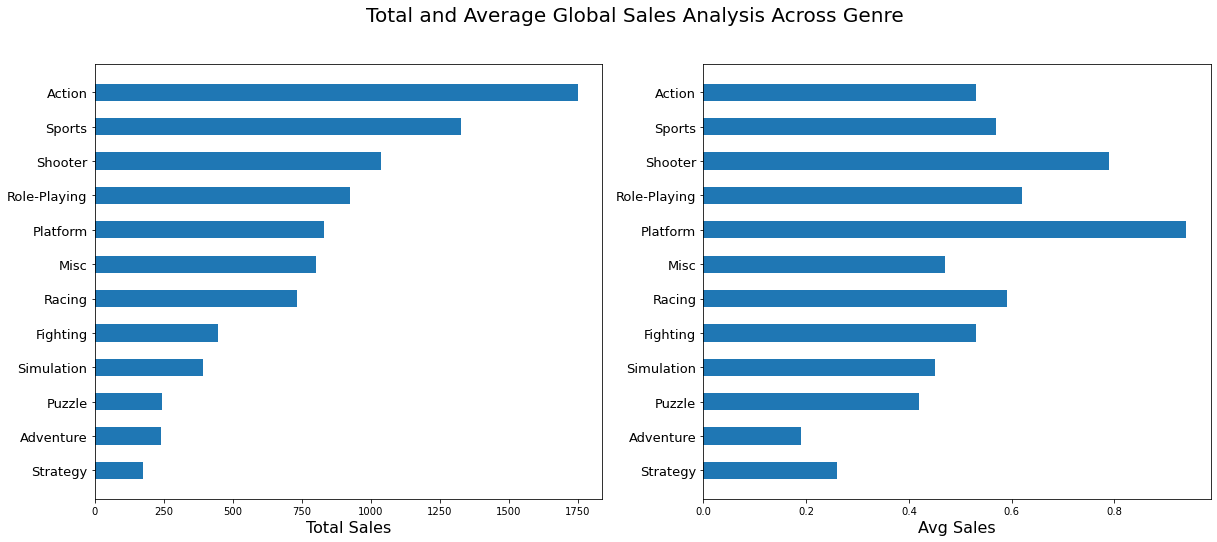

In [92]:
plt.figure(figsize=(20,8))
plt.suptitle('Total and Average Global Sales Analysis Across Genre',fontsize=20)
plt.subplot(121)
plt.barh(sales['Genre'],sales['Total_Sales'],height=0.5)
plt.xlabel('Total Sales',fontsize=16)
plt.yticks(fontsize=13)
plt.subplot(122)
plt.barh(sales['Genre'],sales['Avg_Sales'],height=0.5)
plt.xlabel('Avg Sales',fontsize=16)
plt.yticks(fontsize=13)
plt.show()

In [93]:
# View the correlations
df.corr()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.000000,0.177094,-0.401236,-0.379068,-0.268056,-0.333081,-0.427391
Year,0.177094,1.000000,-0.090940,0.005774,-0.168670,0.040602,-0.074523
NA_Sales,-0.401236,-0.090940,1.000000,0.767672,0.449864,0.634651,0.941036
EU_Sales,-0.379068,0.005774,0.767672,1.000000,0.435658,0.726326,0.902817
JP_Sales,-0.268056,-0.168670,0.449864,0.435658,1.000000,0.290150,0.611893
Other_Sales,-0.333081,0.040602,0.634651,0.726326,0.290150,1.000000,0.748260
Global_Sales,-0.427391,-0.074523,0.941036,0.902817,0.611893,0.748260,1.000000


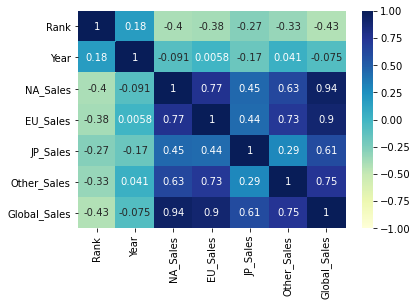

In [94]:
# example of a better corr matrix
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True, vmin=-1, vmax=1);

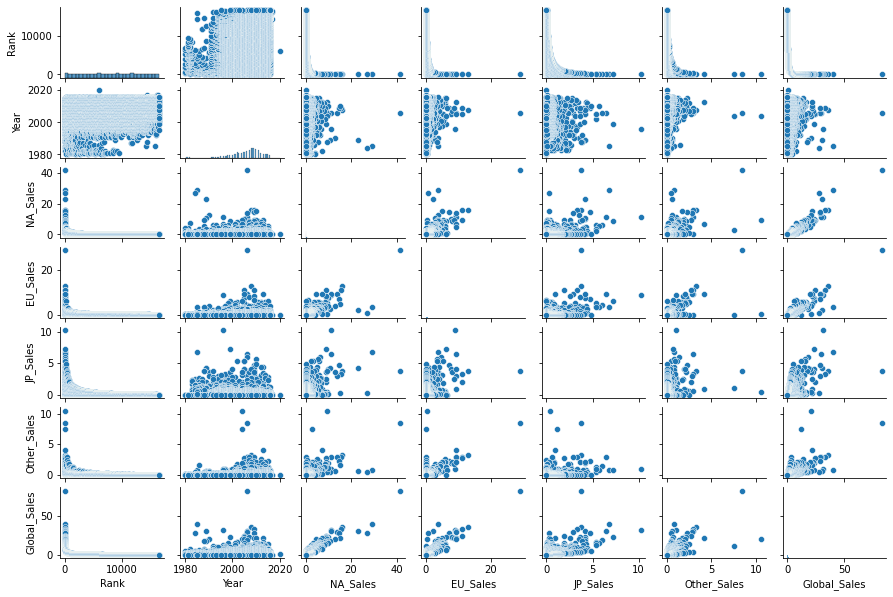

In [95]:
# Plot all of the variable-to-variable relations as scatterplots
sns.pairplot(df, height=1.2, aspect=1.5);

## Modeling MVP stage
Creating model assuming game released in Japan and Europe markets first to predict global sales value.

In [96]:
# Create an empty model
lr = LinearRegression()

# taining data
X = df[['JP_Sales','EU_Sales']]

# Choose the response variable(s)
y = df['Global_Sales'] - (df['JP_Sales'] + df['EU_Sales'])

# Fit the model to the full dataset
lr.fit(X, y)

# Print out the R^2 for the model against the full dataset
lr.score(X,y)

0.6607548739872804

In [97]:

reg = linear_model.Ridge(alpha=.5)
reg.fit(X, y)
reg.score(X,y)

0.6607548660348703

In [98]:
reg2 = linear_model.Lasso(alpha=0.1)
reg2.fit(X, y)
reg2.score(X,y)

0.6064457088455986

In [99]:
reg3 = linear_model.LassoLars(alpha=.1, normalize=False)
reg3.fit(X, y)
reg3.score(X,y)

0.6064457088455988

In [100]:
reg4 = RidgeCV(alphas=0.1)
reg4.fit(X, y)
reg4.score(X,y)

0.6607548736691129